# STGCN Ver2

## ref
- <https://github.com/miruetoto/yechan3/tree/main/posts/3_Researches/ITSTGCN/itstgcn>
- <https://miruetoto.github.io/yechan3/posts/3_Researches/ITSTGCN/2023-03-18-SimulationPlanner-Tutorial.html#plnr_gnar_block>

## 2022/06/01 ~ 2022/09/15

- train 2022-06-01 00:00:00 ~ 2022-08-14 17:00:00
- test 2022-08-14 18:00:00 ~ 2022-09-15 23:00:00

## Import

In [1]:
import eptstgcn
import torch
import eptstgcn.planner

import warnings
warnings.filterwarnings('ignore')

## Read Data

In [2]:
url = "https://raw.githubusercontent.com/pinkocto/noteda/main/posts/SOLAR/data2/stgcn_data2.json"
loader = eptstgcn.DatasetLoader(url)
dataset = loader.get_dataset(lags=4)

In [3]:
train_dataset, test_dataset = eptstgcn.utils.temporal_signal_split(dataset, train_ratio = 0.7)

## LRNR

- ref: <https://seoyeonc.github.io/blog/posts/GCN/2023-03-17-ITSTGCN-Tutorial.html>

In [4]:
lrnr = eptstgcn.StgcnLearner(train_dataset, dataset_name = 'data2(2022/06/01 ~ 2022/09/15)')

In [5]:
lrnr.learn(filters=32, epoch=50)

In [6]:
# import pickle 
# with open('./lrnr_model/stgcn_ver2_data2_cancel_normal.pickle','wb') as fw:
#     pickle.dump(lrnr, fw)

In [7]:
import pickle 
with open('./lrnr_model/stgcn_ver2_data2_cancel_normal.pickle', 'rb') as f: 
    model = pickle.load(f)

## Visualization

In [8]:
evtor = eptstgcn.Evaluator(model, train_dataset, test_dataset)

In [11]:
# fig = evtor.plot('--', label='observed data')
# fig.tight_layout()
# fig

### train

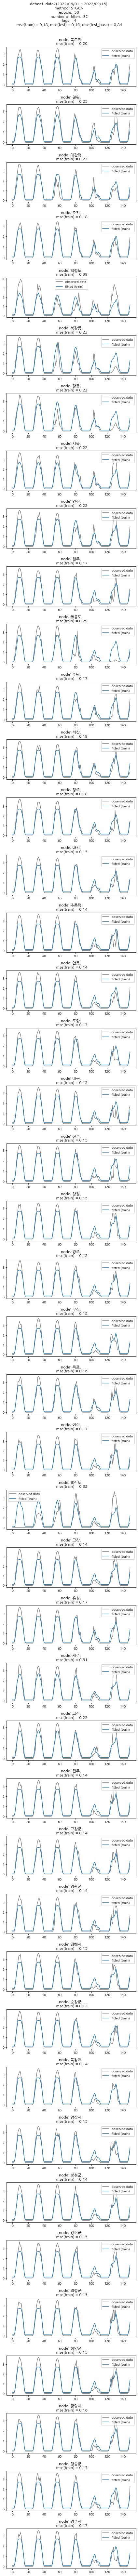

In [9]:
evtor.tr_plot(t=150, label='observed data')

### test

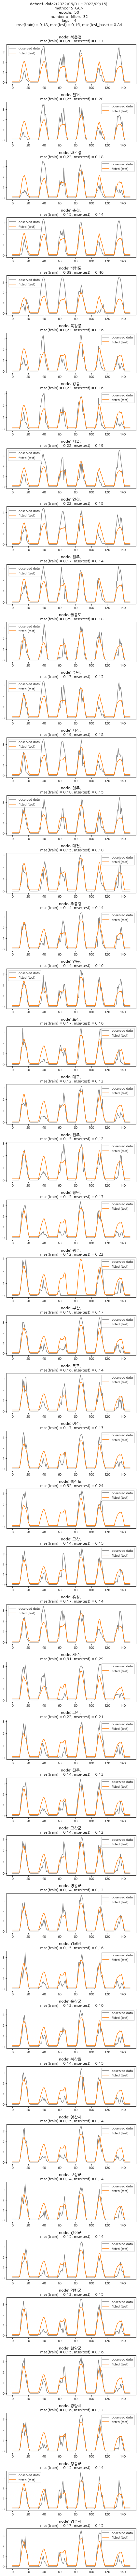

In [10]:
evtor.test_plot(t=150, label='observed data')

## Simulation

In [11]:
plans_stgcn = {
    'max_iteration': 30, 
    'method': ['EPT-STGCN'], 
    'lags': [4], 
    'nof_filters': [32], 
    'epoch': [50]
}

In [12]:
# plnr = eptstgcn.planner.PLNR_STGCN(plans_stgcn,loader,dataset_name='data2')

In [13]:
# plnr.simulate()

1/30 is done
2/30 is done
3/30 is done
4/30 is done
5/30 is done
6/30 is done
7/30 is done
8/30 is done
9/30 is done
10/30 is done
11/30 is done
12/30 is done
13/30 is done
14/30 is done
15/30 is done
16/30 is done
17/30 is done
18/30 is done
19/30 is done
20/30 is done
21/30 is done
22/30 is done
23/30 is done
24/30 is done
25/30 is done
26/30 is done
27/30 is done
28/30 is done
29/30 is done
30/30 is done
All results are stored in ./simulation_results/2023-04-23_01-41-09.csv


In [14]:
# import pickle
# with open('./simul_model/stgcn_ver2_data2_cancel_normal.pickle', 'wb') as fw:
#     pickle.dump(plnr, fw)

In [15]:
with open('./simul_model/stgcn_ver2_data2_cancel_normal.pickle', 'rb') as f:
    simul_model = pickle.load(f)

In [16]:
df_simul_no = simul_model.simulation_results
df_simul_no

,dataset,method,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,data2,EPT-STGCN,4,32,50,0.207058,0.192318,405.406879
1,data2,EPT-STGCN,4,32,50,0.183151,0.166525,406.358098
2,data2,EPT-STGCN,4,32,50,0.187727,0.170964,405.92099
3,data2,EPT-STGCN,4,32,50,0.183493,0.165333,405.771331
4,data2,EPT-STGCN,4,32,50,0.183788,0.163304,406.80101
5,data2,EPT-STGCN,4,32,50,0.184463,0.166215,404.526357
6,data2,EPT-STGCN,4,32,50,0.184557,0.168805,404.531185
7,data2,EPT-STGCN,4,32,50,0.182589,0.16412,403.679201
8,data2,EPT-STGCN,4,32,50,0.18965,0.168722,404.699471
9,data2,EPT-STGCN,4,32,50,0.181751,0.161628,404.820747


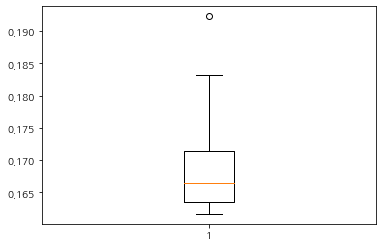

In [18]:
import matplotlib.pyplot as plt
plt.boxplot(df_simul_no['mse(test)'])
plt.show()